# Import

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import itertools
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
import shapefile as shp

# Creating DataFrame

In [3]:
df1 = pd.read_csv('MOD33.csv')

In [4]:
df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
df2 = pd.read_csv('MOD3P.csv')

In [6]:
df2

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [7]:
df2.drop('id', axis=1, inplace= True)

In [8]:
frames = [df1, df2]

In [9]:
df = pd.concat(frames, axis=1)

In [10]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# Data Cleaning

In [11]:
#Drop repeat columns
df = df.drop(columns= ['id','extraction_type_group','extraction_type_class', 'funder', 'date_recorded','installer','wpt_name','basin','subvillage','region','lga','ward','recorded_by','scheme_management','scheme_name','management_group','payment_type','source_type','source_class','waterpoint_type_group'],axis=1)

In [12]:
#drop Na's
df.dropna(inplace=True)

In [13]:
#Changing Columns to categories
df[['num_private','region_code','district_code','construction_year']] = df[['num_private','region_code','district_code','construction_year']].astype('category')

In [14]:
#factorize target variable
df['status_group'] = pd.factorize(df.status_group) [0] + 1

In [15]:
#Changing Columns to Bools
C = df[['public_meeting','permit', 'construction_year']].astype('bool')
df[['public_meeting','permit', 'construction_year']] = C

In [16]:
df

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,status_group
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,True,False,True,gravity,vwc,pay annually,soft,good,enough,enough,spring,communal standpipe,1
2,25.0,686,37.460664,-3.821329,0,21,4,250,True,True,True,gravity,vwc,pay per bucket,soft,good,enough,enough,dam,communal standpipe multiple,1
3,0.0,263,38.486161,-11.155298,0,90,63,58,True,True,True,submersible,vwc,never pay,soft,good,dry,dry,machine dbh,communal standpipe multiple,2
4,0.0,0,31.130847,-1.825359,0,18,1,0,True,True,False,gravity,other,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe,1
5,20.0,0,39.172796,-4.765587,0,4,8,1,True,True,True,submersible,vwc,pay per bucket,salty,salty,enough,enough,other,communal standpipe multiple,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0,3,5,125,True,True,True,gravity,water board,pay per bucket,soft,good,enough,enough,spring,communal standpipe,1
59396,4700.0,1212,35.249991,-9.070629,0,11,4,56,True,True,True,gravity,vwc,pay annually,soft,good,enough,enough,river,communal standpipe,1
59397,0.0,0,34.017087,-8.750434,0,12,7,0,True,False,False,swn 80,vwc,pay monthly,fluoride,fluoride,enough,enough,machine dbh,hand pump,1
59398,0.0,0,35.861315,-6.378573,0,1,4,0,True,True,False,nira/tanira,vwc,never pay,soft,good,insufficient,insufficient,shallow well,hand pump,1


In [17]:
df.status_group.value_counts()

1    29065
2    20349
3     3867
Name: status_group, dtype: int64

# EDA

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

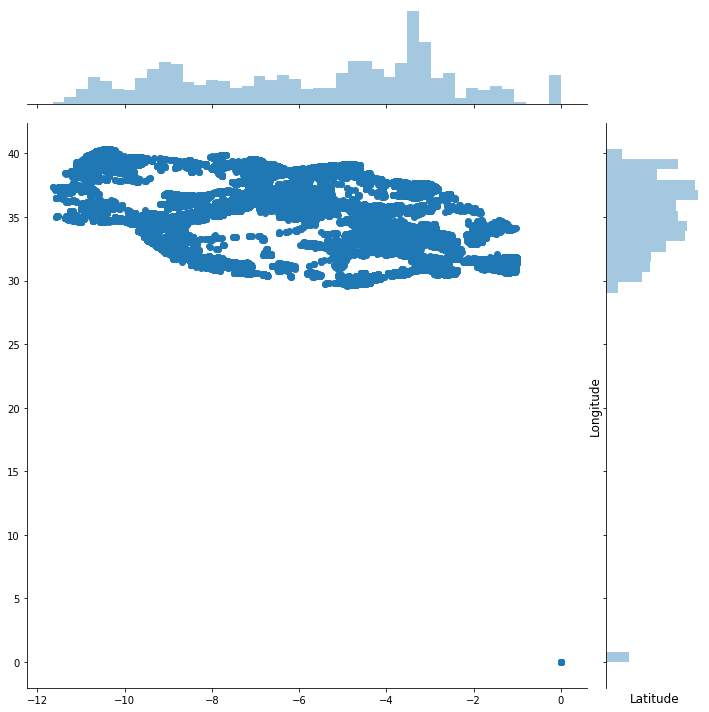

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [18]:
#Mapping out Tanzania
plt.figure(figsize=(10,10))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [19]:
#1 is functional
#2 is non functinal
#3 functional needs repair

(array([5.3062e+04, 1.5800e+02, 5.5000e+01, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.,  3050.,  6100.,  9150., 12200., 15250., 18300., 21350.,
        24400., 27450., 30500.]),
 <a list of 10 Patch objects>)

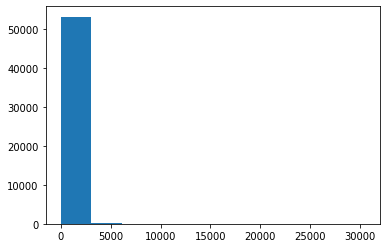

In [20]:
plt.hist(df['population'])

In [21]:
df

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,status_group
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,True,False,True,gravity,vwc,pay annually,soft,good,enough,enough,spring,communal standpipe,1
2,25.0,686,37.460664,-3.821329,0,21,4,250,True,True,True,gravity,vwc,pay per bucket,soft,good,enough,enough,dam,communal standpipe multiple,1
3,0.0,263,38.486161,-11.155298,0,90,63,58,True,True,True,submersible,vwc,never pay,soft,good,dry,dry,machine dbh,communal standpipe multiple,2
4,0.0,0,31.130847,-1.825359,0,18,1,0,True,True,False,gravity,other,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe,1
5,20.0,0,39.172796,-4.765587,0,4,8,1,True,True,True,submersible,vwc,pay per bucket,salty,salty,enough,enough,other,communal standpipe multiple,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0,3,5,125,True,True,True,gravity,water board,pay per bucket,soft,good,enough,enough,spring,communal standpipe,1
59396,4700.0,1212,35.249991,-9.070629,0,11,4,56,True,True,True,gravity,vwc,pay annually,soft,good,enough,enough,river,communal standpipe,1
59397,0.0,0,34.017087,-8.750434,0,12,7,0,True,False,False,swn 80,vwc,pay monthly,fluoride,fluoride,enough,enough,machine dbh,hand pump,1
59398,0.0,0,35.861315,-6.378573,0,1,4,0,True,True,False,nira/tanira,vwc,never pay,soft,good,insufficient,insufficient,shallow well,hand pump,1


In [23]:
#Checking default of 
year = df.groupby(['construction_year', 'status_group']).size().unstack(1)
year

status_group,1,2,3
construction_year,,,
False,9283,7711,1586
True,19782,12638,2281


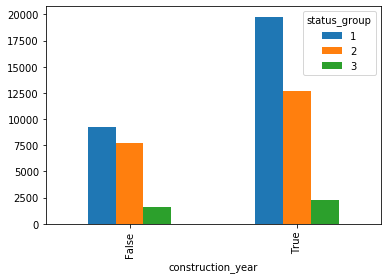

In [24]:
year.plot(kind='bar')

In [27]:
#Checking default of 
height = df.groupby(['gps_height', 'status_group']).size().unstack(1)
height

status_group,1,2,3
gps_height,,,
-90,1.0,NaN,NaN
-63,2.0,NaN,NaN
-59,NaN,1.0,NaN
-57,1.0,NaN,NaN
-55,NaN,1.0,NaN
...,...,...,...
2623,1.0,NaN,NaN
2626,2.0,NaN,NaN
2627,NaN,1.0,NaN


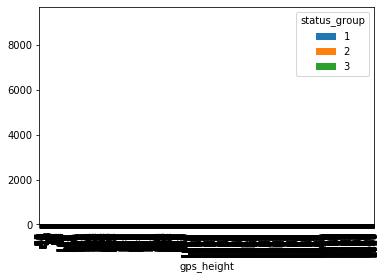

In [28]:
height.plot(kind='bar')

In [29]:
df.gps_height

0        1390
2         686
3         263
4           0
5           0
         ... 
59395    1210
59396    1212
59397       0
59398       0
59399     191
Name: gps_height, Length: 53281, dtype: int64

# Feature Engineering

In [19]:
# Create a column that shows how many years the well has been operational
df['years_operational'] = df['construction_year'].apply(lambda x : 2020-x)

In [20]:
#replacing non-recorded years with 60
df['years_operational'].replace(2020, 60, inplace=True)

In [21]:
#creating dummies
df = pd.get_dummies(df,columns=['district_code','region_code','num_private','quality_group','quantity_group','management','payment','water_quality','quantity','source', 'waterpoint_type','extraction_type'])

# Feature Selection

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.40515225e-02 7.67676055e-02 1.52048400e-01 1.53388634e-01
 5.32916389e-02 8.85891972e-03 1.21656382e-02 4.68431532e-03
 4.61871534e-03 1.33020822e-04 9.39703274e-03 7.51473519e-03
 7.97646848e-03 5.79350970e-03 3.68474050e-03 4.14994517e-03
 4.11611504e-03 2.06686707e-03 4.58900573e-04 3.34596499e-04
 1.40632015e-03 1.79601194e-03 9.74723347e-04 1.22872795e-03
 2.11969784e-04 1.64722080e-04 2.58962427e-04 1.67989487e-05
 4.13482148e-05 2.87904160e-03 1.87433126e-03 3.56786636e-03
 2.40166928e-03 3.01697564e-03 1.79730614e-03 3.07553202e-04
 1.51708297e-03 5.64559735e-04 1.72156085e-03 8.12127259e-03
 3.42429199e-03 1.38603493e-03 2.19392631e-03 2.52260317e-03
 4.79875383e-03 3.10000125e-03 3.40200063e-03 3.16198937e-03
 1.50752651e-03 2.48553197e-03 4.55233470e-04 0.00000000e+00
 1.52967057e-03 1.44537832e-03 1.54902163e-03 6.43685386e-04
 9.19015192e-04 2.31170893e-04 7.70750628e-05 8.35977370e-05
 1.52697662e-04 1.70149237e-04 6.61394132e-05 6.87864460e-05
 5.17682329e-05 1.503377

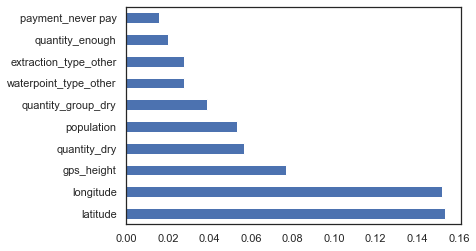

In [25]:
# Bar Graph with most important features
X = df.drop('status_group', axis = 1)
y= df['status_group']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
# We can see that latitude, longitude and, gps hieght have the highest correlation when determining if the well's 
    #are in need of repair or not

# Model Fitting and Hyper Parameter Tuning

In [28]:
# Train Test Split Data:
#Split 
X = df.drop('status_group', axis = 1)
y= df['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## Logistic Regression

In [29]:
logreg = LogisticRegression(class_weight = 'balanced', verbose=1)

In [30]:
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [31]:
y_predlogreg = logreg.predict(X_test)

In [32]:
accuracy_score(y_test, y_predlogreg)

0.7095563396141431

In [33]:
test_f1 = f1_score(y_test, y_predlogreg,
                  average='weighted')
test_f1

0.7164251052573287

In [34]:
print("Precision Score : ",precision_score(y_test, y_predlogreg, average='weighted'))
print("Recall Score : ",recall_score(y_test, y_predlogreg, average='weighted'))

Precision Score :  0.7313060813812753
Recall Score :  0.7095563396141431


## Bagging Classifier

In [35]:
bag = BaggingClassifier(random_state = 1, max_features = 25, n_estimators = 15, max_samples = 100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=25, max_samples=100, n_estimators=15,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [36]:
pred = bag.predict(X_test)
f1_score(y_test, pred, average='weighted')


0.6337036224485595

In [37]:
accuracy_score(y_test, pred)

0.6706703700923354

In [38]:
recall_score(y_test, pred, average='weighted')

0.6706703700923354

In [39]:
precision_score(y_test, pred, average='weighted')

0.6539206497494208

## XGBoosting model

In [41]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)

In [42]:
f1_score(y_test, pred, average='weighted')

0.7197543757570461

In [43]:
accuracy_score(y_test, pred)

0.744613767735155

In [44]:
recall_score(y_test, pred, average='weighted')

0.744613767735155

In [45]:
precision_score(y_test, pred, average='weighted')

0.7570475316693183

## Random Forrest

In [ ]:
clf_cv = RandomForestClassifier(random_state=27, class_weight = 'balanced')
clf_cv.fit(X_train, y_train)
preds = clf_cv.predict(X_test)
#n_estimators = 250, min_samples_leaf = 3, max_depth = 12, max_leaf_nodes = 225, max_features = 15, min_samples_split= 15

In [ ]:
f1_score(y_test, preds, average='weighted')

In [ ]:
accuracy_score(y_test, preds)

In [ ]:
precision_score(y_test, preds, average='weighted')

In [ ]:
recall_score(y_test, preds, average='weighted')

# Model Evaluation

# Final Model